<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/IPL_EDA_DashBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_matches = pd.read_csv('/content/drive/My Drive/DataSet/IPL Matches 2008-2020.csv')
df_matches.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


In [4]:
df_matches.shape

(816, 17)

In [6]:
df_matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [98]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Players who won maximum number of times Man of the Match 

In [15]:
MoM = df_matches['player_of_match'].value_counts()
print(MoM)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64


In [22]:
MoM_names = MoM.index[0:5].tolist()
MoM_names

['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

In [24]:
Mom_values = MoM[0:5].tolist()
Mom_values

[23, 22, 18, 17, 17]

[]

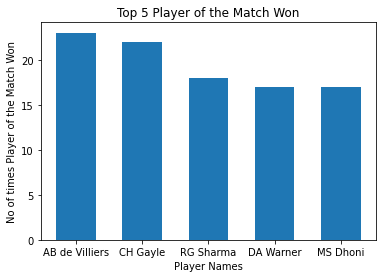

In [101]:
plt.bar(MoM_names, Mom_values, width=0.6)
plt.ylabel('No of times Player of the Match Won')
plt.xlabel('Player Names')
plt.title('Top 5 Player of the Match Won')
plt.plot()

# No. of Matches won by each team

In [34]:
matches_won_by_each_team = df_matches['winner'].value_counts()
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [36]:
#merging teams win delhi capital or daredavils
matches_won_by_each_team['Delhi Daredevils'] = matches_won_by_each_team['Delhi Daredevils'] + matches_won_by_each_team['Delhi Capitals']
matches_won_by_each_team['Delhi Daredevils']

86

In [37]:
matches_won_by_each_team['Pune Warriors'] = matches_won_by_each_team['Pune Warriors'] + matches_won_by_each_team['Rising Pune Supergiant'] +matches_won_by_each_team['Rising Pune Supergiants']
matches_won_by_each_team['Pune Warriors']

27

In [43]:
#dropping merged index
matches_won_by_each_team.drop(index=['Rising Pune Supergiants', 'Rising Pune Supergiant','Delhi Capitals' ], inplace=True)

In [44]:
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                86
Sunrisers Hyderabad             66
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   27
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [45]:
#reanming index name
matches_won_by_each_team.rename(index = {'Delhi Daredevils' : 'Delhi Daredevils/Capitals', 'Pune Warriors' : 'Pune Warriors/Rising Pune Supergiants'}, inplace = True)

In [46]:
matches_won_by_each_team

Mumbai Indians                           120
Chennai Super Kings                      106
Kolkata Knight Riders                     99
Royal Challengers Bangalore               91
Kings XI Punjab                           88
Rajasthan Royals                          81
Delhi Daredevils/Capitals                 86
Sunrisers Hyderabad                       66
Deccan Chargers                           29
Gujarat Lions                             13
Pune Warriors/Rising Pune Supergiants     27
Kochi Tuskers Kerala                       6
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


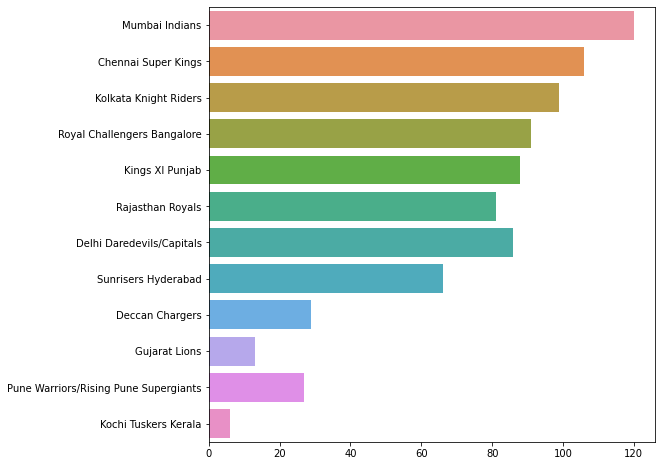

In [68]:
fig = plt.figure(figsize=(8,8))
sns.barplot(  matches_won_by_each_team[:].tolist(),matches_won_by_each_team.index.tolist(), orient = 'h')
plt.show()

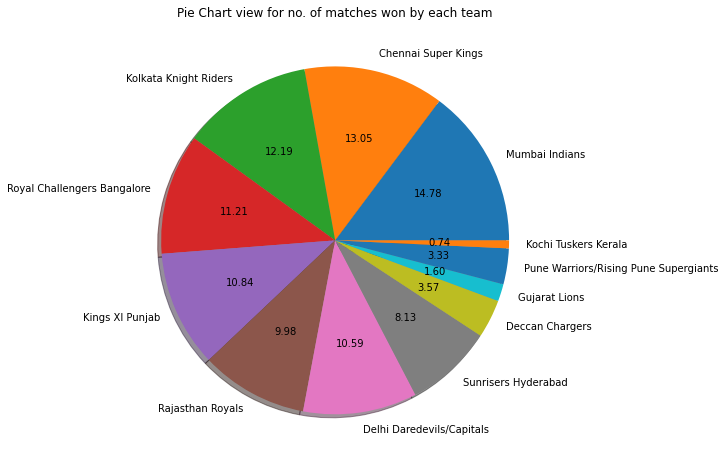

In [84]:
fig = plt.figure(figsize=(8,8))
plt.pie(matches_won_by_each_team[:],labels = matches_won_by_each_team.index.tolist(), autopct='%.2f', shadow= True)
plt.title('Pie Chart view for no. of matches won by each team')
plt.show()

# Matches Umpired by Umpires

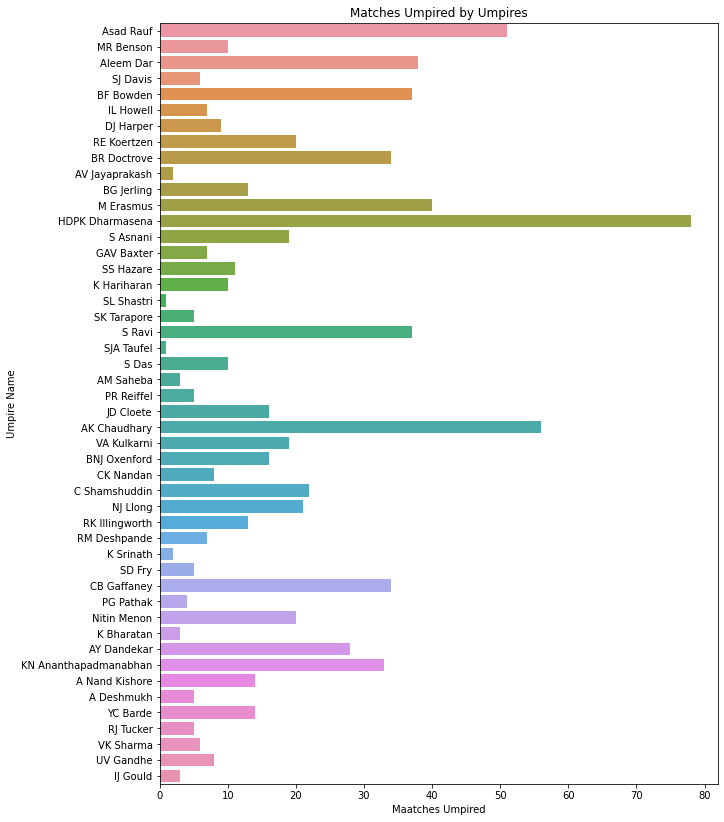

In [96]:
fig = plt.figure(figsize=(10,14))
sns.countplot(y='umpire1', data = df_matches, orient='v')
plt.title('Matches Umpired by Umpires')
plt.ylabel('Umpire Name')
plt.xlabel('Maatches Umpired')
plt.show()

# Matches won by Team1 against Team2

In [102]:
df_matches['team1']

0      Royal Challengers Bangalore
1                  Kings XI Punjab
2                 Delhi Daredevils
3                   Mumbai Indians
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813    Royal Challengers Bangalore
814                 Delhi Capitals
815                 Delhi Capitals
Name: team1, Length: 816, dtype: object

In [149]:
#matches_won_by_team1_team2

def matches_won_by_team1_team2(team1, team2):
  temp1 = df_matches[ (df_matches['team1'] == team1) & (df_matches['team2']==team2)]
  temp2 = df_matches[ (df_matches['team1'] == team2) & (df_matches['team2']==team1)]

  total_matches = temp1.shape[0] + temp2.shape[0]

  #Matches won by the teams
  matches_won_by_team1 = temp1[temp1['winner'] == team1].shape[0] + temp2[temp2['winner'] == team1].shape[0]

  print('Total matches played = ', total_matches)
  print('Matches won by ', team1 ,'= ',matches_won_by_team1)
  print('Accuracy = ', round((matches_won_by_team1*100)/total_matches, 2), '%')

  new_df = pd.concat([temp1,temp2], ignore_index = True)

  #plotting
  fig = plt.figure(figsize=(5,5))
  sns.countplot(x = 'winner', data = new_df,dodge= False)
  plt.ylim(0,18)
  plt.title('Matches won against each other')
  plt.xlabel('Teams Name')
  plt.ylabel('Matches Won')
  plt.plot()

Total matches played =  27
Matches won by  Mumbai Indians =  17
Accuracy =  62.96 %


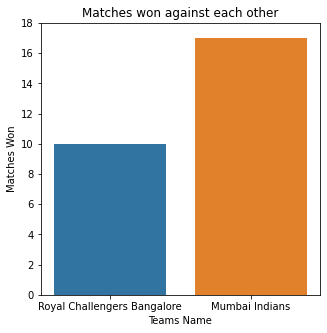

In [150]:
matches_won_by_team1_team2('Mumbai Indians', 'Royal Challengers Bangalore')